

# Investigation of "No-Show" Medical Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is my implementation of the "Data Analysis Process" I've learned through the Data Analysis Nanodegree on Udacity.

The dataset that is under investigation,"No-Show" Appointments Dataset,is a set of information collected from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. Several characteristics about a patient are included in each row such as Gender, Age, Neighbourhood as well as the patient's primary health designation(s) including Hypertension, Diabetes, Alcoholism, and whether the patient is handicapped or not. A period of six months of appointments' data has been investigated below. 



### Questions to be investigated:
- Do the patient's gender affects the probability of no-show appointment?
- What is the petients' Age Distribution of no-show versus show appointments?
- Which neighborhood(s) has/have the highest number of no-show appointments?
- Do no-show appointments have a longer timeframe between Scheduled Date and Appointment Date? What is the correlation between the Number of  Awaiting Days and No-Shows?
- Do no-show appointments occurance increases on specific days of the week?
- Are patients recieving SMS reminders more likely to show up for their appointments? 



### Investigation Methodology 
**The methodology followed to perform the investigation of our dataset is as follows:**
- **STEP 1:** Posing Questions: taking a quick look at the dataset and pose Qs to be answered through the investigation  process. 
- **STEP 2:** Data Wrangling: which includes Assessing and Cleaning Data.
- **STEP 3:** Performing EDA (Exploratory Data Analysis): exploring and then augmenting the data to maximize the potential of my analyses, visualizations, and models.
- **STEP 4:** Drawing conclusions: by Data Visualization and explaining my insights.

# The Investigation

<a id='wrangling'></a>
## Data Wrangling :
## 1- Assessing Data

### Step1: Importing Packages and Libraries for Data Analysis

> **The followig Packages and Libraries will be imported to facilitate the Investigation and increase its effeciency:**
- **Pandas:** Provides data structures designed to make working with “relational” or “labeled” data both intuitive and easy.
- **Numpy:** Provides functions to manipulate large sets of numerical data with effeciency and speed.
- **Seaborn:** It provides a high-level interface for drawing attractive and informative statistical graphics.
- **Matplotlib:**  Prduces publication quality figures in a variety of hardcopy formats and interactive environments across platforms with just a few lines of code.
- **Datetime Class from Datetime:** Allows manipulating dates and times in both simple and complex ways. 



In [963]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

% matplotlib inline

### Step 2: Loading Data into a Jupyter Notebook

In [964]:
df=pd.read_csv('no-show-appointments.csv')

### Step 3: Understanding the Dataset and Posing Questions 

In [965]:
# displaying the first few rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Observations / Changes Needed:**
- Several Qs are posed to be answered through the investigation process.(For organizing puposes, Qs posed are written within the Introduction part above)
- Stripping time from  'ScheduledDay' column will make the dataset easier to work with.
- Stripping time from  'AppointmentDay' column will make the dataset easier to work with.


### Step 4: Checking Columns' Labels 

In [966]:
#printing the columns' labels in the dataframe
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


> **Observations / Changes Needed:**
- Lower case all the columns labels and replacing "-" with "_" whenever exists.
- Correcting some typoes and adding "_" if the name consists of two words.
- Dropping 'Scolarship' column b/c it is a non relevant column to the Dataset.
- Adding 'day_of_week' Column for easier analysis to answer one of the peviosly posed Qs.

### Step 5: Checking the Data Types of the Dataset's Columns

In [967]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> **Observations / Changes Needed:**
- Changing the data type of 'PatientId' from 'float64' to 'int64' will make the dataset easier to work with.
- Changing the data type of 'ScheduledDay' and 'AppointmentDay' from 'object' to 'Datetime' will make the dataset easier to work with.

### Step 6: Checking for Null Values in the Columns 

In [968]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Observations / Changes Needed:**
- No null values in the dataset.

### Step 7: Checking for any Duplicates in the Dataset

In [969]:
#checking the total number of duplicated rows 
sum(df.duplicated())

0

> **Observations / Changes Needed:**
- No duplicated rows in the dataset.

## 2- Cleaning Data

### Step 1: Fix Data Types

Changing the data type of 'PatientId' from 'float64' to 'int64' will make the dataset easier to work with.

In [970]:
df.PatientId = df['PatientId'].astype(np.int64)

Changing the data type of 'ScheduledDay' and 'AppointmentDay' from 'object' to 'Datetime' will make the dataset easier to work with.

In [971]:
df.ScheduledDay   = df.ScheduledDay.apply(np.datetime64)
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

In [972]:
#confirming Datatype Changes
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

### Step 2: Strip Time from 'ScheduledDay' and 'AppointmentDay' Columns

In [973]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [974]:
#confirming changes
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Step 3:  Lower Case all the Columns' Labels and Replace "-" with "_" Whenever Exists

Changing the lebels's letters to lower case and replacing any dash(-) with underscore ( _ ) will make the dataset easier to work with.

In [975]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

#confirming changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Step 4: Correct Typoes and Add "_" if the Label's Name Consists of Two Words

Correcting typoes (spelling mistakes) and Adding underscore to the label's name if it consists (originally) from two words.

In [976]:
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 
                   'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap',
                   'sms_received':'SMS_received'}, inplace = True)

#confirming changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Step 5: Drop 'Scolarship' Column

Because it is a non relevant column to the Dataset.

In [977]:
df.drop('scholarship', axis=1, inplace=True)

#confirming changes
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,1,1,0,0,0,No


### Step 6: Add a new column 'day_of_week'

Adding this column will be helpful when answering one of the previously posted Qs. 

In [978]:
df['day_of_week'] = pd.to_datetime(df['appointment_day']).apply(lambda x: x.isoweekday())

#confirming column addition
sorted(df.day_of_week.unique())

[1, 2, 3, 4, 5, 6]

Replacing the numbers by the name of the day in our newly created 'day_of_week' column.

In [979]:
df['day_of_week']=df['day_of_week'].replace({1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

In [980]:
#Checking the new column's content
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show,day_of_week
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,0,No,Saturday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,Saturday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,Saturday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,Saturday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,1,1,0,0,0,No,Saturday


Getting a list of the edited columns' labels, for an easier assesment of the changes done.

In [981]:
for i, v in enumerate(df.columns):
    print(i, v)

0 patient_id
1 appointment_id
2 gender
3 scheduled_day
4 appointment_day
5 age
6 neighbourhood
7 hypertension
8 diabetes
9 alcoholism
10 handicap
11 SMS_received
12 no_show
13 day_of_week


###  Step 7: Checking for Erroneous Values 

In [982]:
print('age:',sorted(df.age.unique())) # sort the ages to make it easier for outlier checking
print('gender:',df.gender.unique())
print('hypertension:',df.hypertension.unique())
print('diabetes:',df.diabetes.unique())
print('alcoholism:',df.alcoholism.unique())
print('handicap:',df.handicap.unique())
print('SMS_received:',df.SMS_received.unique())
print('no_show:',df.no_show.unique())

age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
gender: ['F' 'M']
hypertension: [1 0]
diabetes: [0 1]
alcoholism: [0 1]
handicap: [0 1 2 3 4]
SMS_received: [0 1]
no_show: ['No' 'Yes']


> **Observations / Changes Needed:**
- Removing age outliers (0 and 115).
- Normalizing 'no_show' column to 0's and 1's. 

### Step 8: Remove Age Outliers 

In [983]:
df=df[(df.age >= 0) & (df.age <= 102)]

#checking the resulting number of rows
df.shape

(110521, 14)

### Step 9: Normalize 'no_show' Column to 0's and 1's

Normalizing 'no_show' column to 0's and 1's where  0 = Showed up to appointment('No') ,
                                              and  1 = did not show up to appointment('Yes').
- **This normalization is aimed to facilitate the upcoming aggregation functions that will be done on this column.**

In [984]:
df['no_show'].replace({'Yes':1 , 'No':0}, inplace=True)

#confirming changes
df.no_show.unique()

array([0, 1], dtype=int64)

### Step 10: Calculate and Add  a New Column to Show Patient's Awaiting Days

> **awaiting_days:** is the rounded number of Days from the Scheduled to the Appointment Day

Patient's Awaiting Days is calculated by finding the difference between the appointment day and scheduled day.

In [985]:
df['awaiting_days'] = (df['appointment_day'] - df['scheduled_day']).dt.days

In [986]:
avg_awaiting_days = round(df.query('no_show == "1"').mean().awaiting_days)
avg_awaiting_days

16.0

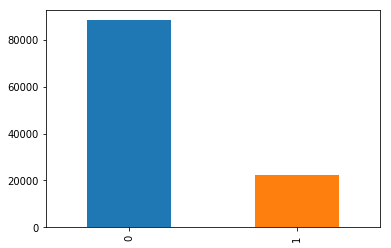

In [987]:
df['no_show'].value_counts().plot(kind='bar');

<a id='eda'></a>
## Exploratory Data Analysis

### Step 1 : Splitting the Data into two Data Frames
**By creating two data frames to separate people who showed up for the appointments from the people who did not show up.**

In [988]:
df_no_show = df[df['no_show'] == 1]
df_show = df[df['no_show'] == 0]

**Checking the newely created Data Frames**

In [989]:
df_no_show.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show,day_of_week,awaiting_days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,1,Saturday,2
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,1,Saturday,2
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,1,1,Saturday,3
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,0,0,0,0,0,1,Saturday,1
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,1,Saturday,2


In [990]:
df_show.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show,day_of_week,awaiting_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,0,0,Saturday,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Saturday,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Saturday,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Saturday,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,1,1,0,0,0,0,Saturday,0


### Step 2: Answering  the Posed Quesions

### Q1: Do the patient's gender affects the probability of no-show appointment?

**Calculating the proportion of No-Show appointments for MALE patients** 

In [991]:
#calculate the total male patients
total_m = df.query('gender == "M"').patient_id.count() 

In [992]:
#calculate the total number of no-show male patients
num_no_show_m = df_no_show.query('gender == "M"').patient_id.count() 

In [993]:
#calculate the proportion of no-show male patients
prop_m = round((num_no_show_m/total_m)*100)
prop_m

20.0

**Calculating the proportion of No-Show appointments for FEMALE patients** 

In [994]:
#calculate the total male patients
total_f = df.query('gender == "F"').patient_id.count() 

In [995]:
#calculate the total number of no-show female patients
num_no_show_f = df_no_show.query('gender == "F"').patient_id.count() 

In [996]:
#calculate the proportion of no-show female patients
prop_f = round((num_no_show_f/total_f)*100)
prop_f

20.0

**Plotting No-Shows By Gender**

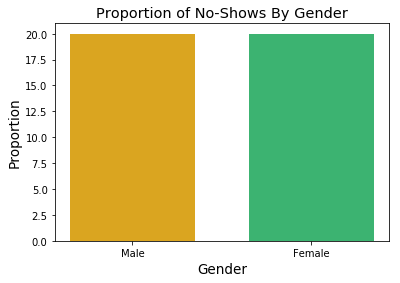

In [997]:
gender = ['Male','Female']
proportion = [prop_m,prop_f]

plt.bar(gender , height=proportion, width=0.7, color=['goldenrod','mediumseagreen'])
plt.xlabel('Gender',fontsize=13.5)
plt.ylabel('Proportion',fontsize=13.5)
plt.title('Proportion of No-Shows By Gender', fontsize=14.5)
plt.show()

**Only for analysis purposes** 

In [998]:
df_gender= df.groupby(['gender','no_show'])['no_show'].count().reset_index(name="count")
df_gender

,gender,no_show,count
0,F,0,57243
1,F,1,14591
2,M,0,30962
3,M,1,7725


In [999]:
#calculating total number of patients by gender
df.groupby(['gender'])['gender'].count().reset_index(name="total number of patient")

,gender,total number of patient
0,F,71834
1,M,38687


In [1000]:
#calculating the total number of appointments
df.shape[0]

110521

#### Observations and Findings:


> - According to the above Bar chart, the patient’s gender has No effect on the likelihood of no-show appointments. 
> - Although the proportion of Male appointments is only 35% of all the appointments, the proportion of no-show appointments for Males are equal to the Females’ proportion (20%). i.e. 20% of Male patients, and 20% of Female patients missed their appointments.

### Q2: What is the petients' Age Distribution of no-show versus show appointments?

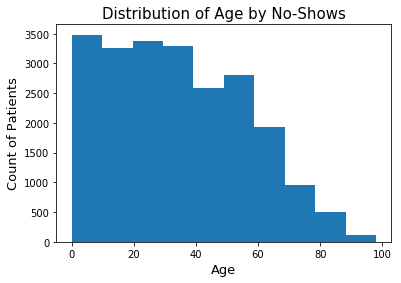

In [1001]:
data = df_no_show['age']
plt.hist(data)
plt.title('Distribution of Age by No-Shows', size=15)
plt.xlabel('Age', size=13)
plt.ylabel('Count of Patients', size=13)
plt.show()

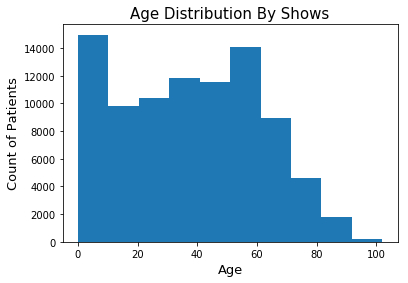

In [1002]:
data = df_show['age']
plt.hist(data)
plt.title('Age Distribution By Shows', size=15)
plt.xlabel('Age', size=13)
plt.ylabel('Count of Patients', size=13)
plt.show()

**Only for analysis purposes** 

In [1003]:
df_no_show['age'].describe()

count    22316.000000
mean        34.306820
std         21.947486
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max         98.000000
Name: age, dtype: float64

In [1004]:
df_show['age'].describe()

count    88205.000000
mean        37.788753
std         23.336014
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        102.000000
Name: age, dtype: float64

#### Observations and Findings:

> - There is a **SLIGHT difference** between the age distribution of no-show patients and the age distribution of the patients who showed up for their appointments, as presented on the above Histograms.
> - Although both distributions are **Right Skewed,** the descriptive statistics generated for both Histograms during the analysis process were **SLIGHTLY HIGHER** for Histogram showing the age distribution of Show-up patients.
> -  **The average age of no-show patients is around 34 years, while the mean age for patients who attended their medical appointments is around 38 years.** 
>- **Additionally, the 50th percentile (Median) for no-show patients is 33 years, while it equals to 38 years in the case of show patients.**

### Q3: Which neighborhood(s) has/have the highest number of no-show appointments?

In [1005]:
df_nbhood=df_no_show.groupby('neighbourhood')['neighbourhood'].count().reset_index(name="count")
df_nbhood_sorted= df_nbhood.sort_values(by='count',ascending=False )
df_nbhood_top5 = df_nbhood_sorted.head(5)
df_nbhood_top5

,neighbourhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703


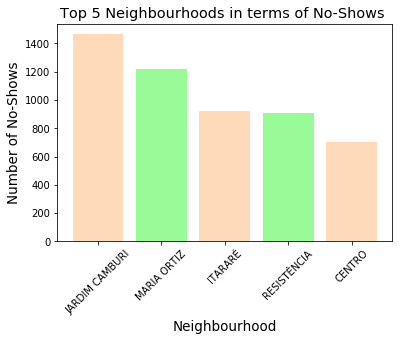

In [1006]:
plt.bar(df_nbhood_top5['neighbourhood'] , height=df_nbhood_top5['count'], width=0.8, color=['peachpuff','palegreen'])
plt.xlabel('Neighbourhood',fontsize=13.5)
plt.xticks(rotation=45)
plt.ylabel('Number of No-Shows',fontsize=13.5)
plt.title('Top 5 Neighbourhoods in terms of No-Shows ',fontsize=14.5)
plt.show()

**Only for analysis purposes** 

In [1007]:
#getting total number of no show appointment
df.query('no_show == "1"').no_show.sum()

22316

In [1008]:
#getting the total number of neighbourhoods of the no-show patients
df_no_show.groupby('neighbourhood').count().shape[0]

80

In [1009]:
# tally up the number of no-show patient living in the top 5 neighbourhoods
df_nbhood_top5['count'].sum()

5216

#### Observations and Findings:

> - The above Bar chart presents the **Top 5 neighborhoods** in terms of No-show appointments. **23% of all patients missing their appointments are living in one of these five neighborhoods.**
> - Although that the residences  of no-show patients are distributed among 80 neighborhoods, **6%** of these patients are living in **“Jardim Camburi”**, which is considered  the top neighborhood in terms of number of no-shows.


### Q4: Do no-show appointments have a longer timeframe between Scheduled Date and Appointment Date? What is the correlation between the Number of  Awaiting Days and No-Shows?

In [1010]:
df_no_outliers =df_no_show.query('0 <= awaiting_days < 92 ')
df_awaiting_days = df_no_outliers.groupby('awaiting_days').no_show.count().reset_index(name="count")

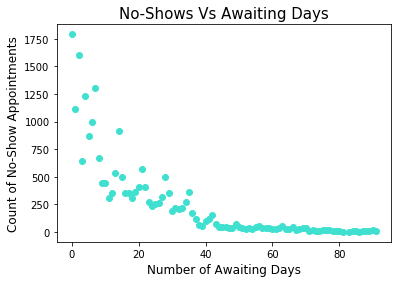

In [1011]:
awaiting_days = df_awaiting_days['awaiting_days']
count = df_awaiting_days['count']
plt.scatter(x= awaiting_days, y= count, color='turquoise')
plt.xlabel('Number of Awaiting Days',fontsize=12)
plt.ylabel('Count of No-Show Appointments',fontsize=12)
plt.title('No-Shows Vs Awaiting Days',fontsize=15)
plt.show()

**Only for analysis purposes** 

In [1012]:
#calculating the average of the awaiting_days
round(df_no_outliers.awaiting_days.mean())

16

In [1013]:
df_awaiting_days.head(5)

,awaiting_days,count
0,0,1792
1,1,1113
2,2,1602
3,3,642
4,4,1231


#### Observations and Findings:

> - **The shown Scatter plot illustrates a Negative Correlation between the number of Awaiting days and the number of no-show appointments.**
> - Shorter timeframe between Scheduled day and Appointment day increases the number of no-show appointments occurrences.
> - When the number of Awaiting days between Scheduled day and Appointment day, equaled to zero, around 1790 patients failed to show up for their appointments.
> - **It is important to mention that the above correlation does not necessarily imply causation.**


### Q5: Do no-show appointments occurance increases on specific days of the week? 

In [1014]:
df_day = df_no_show.groupby('day_of_week')['no_show'].count().reset_index(name="count")
df_day

,day_of_week,count
0,Friday,3336
1,Saturday,4037
2,Sunday,9
3,Thursday,5093
4,Tuesday,4689
5,Wednesday,5152


In [1015]:
day_of_week =('Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
no_shows =(4689,5152,5093,3336,4037,9)

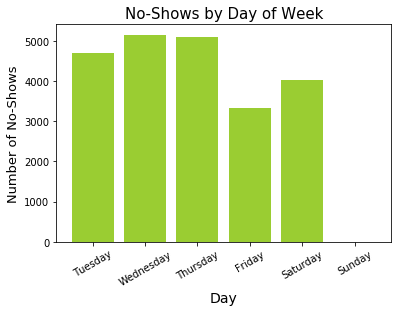

In [1016]:
index = np.arange(len(day_of_week))
plt.bar(index, no_shows, color='yellowgreen')
plt.xlabel('Day',fontsize=14)
plt.ylabel('Number of No-Shows',fontsize=13)
plt.xticks(index, day_of_week, rotation=30) 
plt.title('No-Shows by Day of Week',fontsize=15)
plt.show()

In [1017]:
df_day_gender= df_no_show.groupby(['day_of_week','gender'])['no_show'].count().reset_index(name="count")

In [1018]:
df_day_gender

,day_of_week,gender,count
0,Friday,F,2151
1,Friday,M,1185
2,Saturday,F,2612
3,Saturday,M,1425
4,Sunday,F,7
5,Sunday,M,2
6,Thursday,F,3299
7,Thursday,M,1794
8,Tuesday,F,3100
9,Tuesday,M,1589


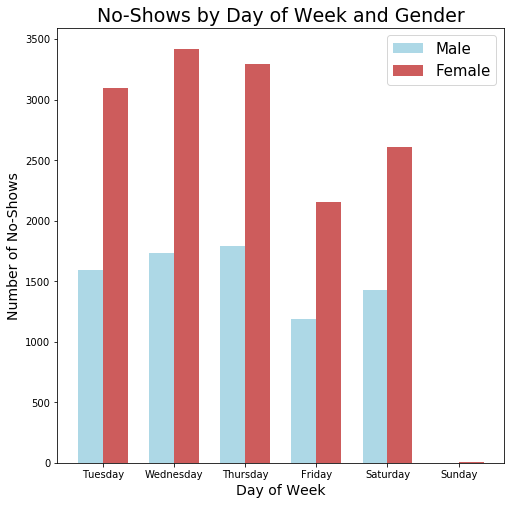

In [1019]:
male = (1589, 1730, 1794, 1185, 1425, 2)
female = (3100, 3422, 3299, 2151, 2612, 7)

ind = np.arange(len(male))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(ind - width/2, male, width,
                color='lightblue', label='Male')
rects2 = ax.bar(ind + width/2, female, width,
                color='IndianRed', label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Day of Week', size=14)
ax.set_ylabel('Number of No-Shows', size=14)
ax.set_title('No-Shows by Day of Week and Gender', size=19)
ax.set_xticks(ind)
ax.set_xticklabels(('Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
ax.legend(fontsize = 15)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')
     

    plt.show()

**Only for analysis purposes** 

In [1020]:
#calculating the total number of Sunday appoimtments  
sun_no_show = df.query('day_of_week == "Sunday"').day_of_week.count()
sun_no_show 

39

In [1021]:
#calculating the total number of no-show appointments 
total_no_show = df_day['count'].sum()
total_no_show

22316

#### Observations and Findings:

> -As presented on the first Bar chart, **Wednesday had the highest number of total number of no-shows with almost 5150 missed appointments.** With a difference of only 59 no-shows, **Thursday comes in the second place** in terms of the total number of no shows. **The total number of missed appointments on these two days forms 46% of all no-show medical appointments.**
> - Moreover, **taking into account the gender of the no-show patients, Wednesday** had the greatest number of total **Female** no-shows with around 3420 appointments missed by Females on Wednesday, as shown on the second Bar chart.
> - On the other hand, Thursday experienced the highest total number of **Males** missing their medical appointments with 1794 no-show Male appointments.
> - However, with the lowest number of total booked appointments (39 appointments), **Sunday has also the lowest no-show occurrences** with only 2 and 7 no-shows for Males and Females, respectively. 
> - Finally, it is worth mentioning that **Monday is excluded** from the above analysis,as the dataset does not include any Monday appointments. 


### Q6: Are patients recieving SMS reminders more likely to show up for their appointments? 

In [1022]:
df_SMS= df.query('SMS_received == "1"')
df_SMS_received = df_SMS.groupby('no_show')['no_show'].count().reset_index(name="count")
df_SMS_received

,no_show,count
0,0,25697
1,1,9784


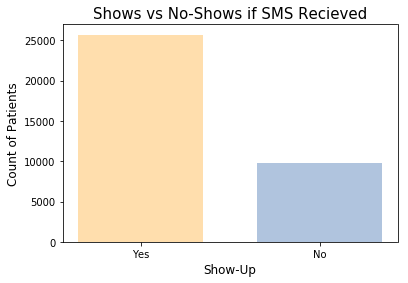

In [1023]:
status = ['Yes','No']
plt.bar(status , height=df_SMS_received['count'], width=0.7, color=['navajowhite','lightsteelblue'])
plt.xlabel('Show-Up',fontsize=12)
plt.ylabel('Count of Patients',fontsize=12)
plt.title('Shows vs No-Shows if SMS Recieved',fontsize=15)  
plt.show()

**Only for analysis purposes** 

In [1024]:
#getting the total number of SMS reminders sent for patients 
df.query('SMS_received == "1"').SMS_received.sum()

35481

In [1025]:
#getting total number of appointments
total_app = df.shape[0]

#### Observations and Findings:

> - As illustrated on the above Bar chart, **SMS reminders contributed in increasing the number of patients showing up for their appointments.** Around 70% of all the patients who received SMS reminders showed up for their appointments. 
> - However, SMS reminders was sent to **only 32%** of all patients who booked appointments. **Which means that almost 68% of all patients did not receive SMS reminders prior to their appointments.** This might be a factor that could affects negatively the probability of showing up for an appointment which would lead to an increase in the number of no-show appointments.


<a id='conclusions'></a>
## Conclusions

### As a Conclusion, 
- The patient’s gender has **No clear effect** on the likelihood of no-show appointments. 
- **The age distribution of no-show patients is close to the distributions of patients showing up for their appointments** with a mean age of 34 years and 38 years, respectively. While the median for the no-show patients is 33 years, the median for show patients is 38 years.
- **Longer timeframe** between Scheduled day and Appointment day **increases probability** of show up appointment’s occurrences.
- There is a **Negative Correlation** between the number of Awaiting days and the number of no-show appointments.
- **Wednesday had the highest number of total no-shows** with almost 5150 missed appointments.
- SMS reminders have enhanced the patient’s likelihood of attending their appointments. **In my opinion, Ministry of Health in Brazil needs to consider applying the SMS reminder service to all of the medical appointments. This will surly decrease the number of no-show appointments.**


### Limitations: 
- **‘handicap’ column’ present the handicap levels (or degrees) by a number that ranges from 1 to 4, with no additional clarification included to explain the meaning of these numbers.**
- **The absence of Monday’s appointments from the dataset with no logical reason or justification found to explain this absence.**


<a id='resources'></a>
## Resources

- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
- https://pandas.pydata.org/pandas-docs/stable/
- http://www.numpy.org/_downloads/numeric-manual.pdf
- https://matplotlib.org/
- https://docs.python.org/3/library/datetime.html
- https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas
- https://stackoverflow.com/questions/37583870/difference-between-two-dates-in-pandas-dataframe
- https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik
- https://stackoverflow.com/questions/29479357/apply-sort-to-a-pandas-groupby-operation
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
- https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
- https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
- https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
